Processing next particle...
Processing next particle...


KeyboardInterrupt: 

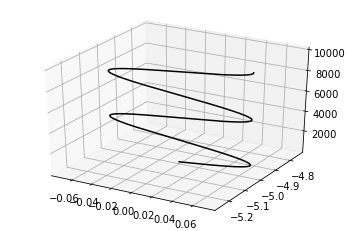

In [1]:
## trajectory.py
## modeling of a charged particle trajectory with numpy and matplotlib

from mpl_toolkits.mplot3d import axes3d
import numpy as np 
import matplotlib.pyplot as plt
import math

# THIS IS THE PART WHERE YOU MODIFY THE PARAMETERS # ====================================================================================
# =======================================================================================================================================

# It would be cool to be able to parse arguments from the command line, but it's 5:00 AM right now, and while I am having a 
# fun time right now that isn't exactly necessary functionality. We'll just hard-code the arguments here, instead.

# Here's how it works: you code the number of particles that you want to plot, and then you create arrays with the properites of those
# particles, *in order*. That is, the first velocity in the velocity list should correspond with the first mass in the mass list.

# If the lengths of all these lists are not equal to numTrajectories, you are doing something wrong.

numTrajectories = 3 # Number of trajectories that you want to plot

masses = [.05, .075, .075] # Two numbers, representing trajectories
positions = [[0., -5., 0.], [0., 0., 0], [0.,  5.,  0.]] # An array of 3-vectors representing startig position
velocities = [[.01, 0., 100.], [-.01, 0., 100.], [0., 0., 100.]] # An array of 3-vectors representing velocities
charges = [1, 2, 1]
formatStrings = ["k", "r", "b-"] # Standard pyplot formatting strings for each trajectory plot

# A note about time: 
# The smaller your steps are, the more precise your result will be. 
# This is important when using Euler's method; if too-large steps are used, Euler is incapable of properly representing a 
# force that should result in uniform circular motion, and will instead show an outward spiral.
# This can also be combated by using an alternate numerical integration method, such as Runge Kutta; however, 
# since here we are calculating relatively few and short paths, it is sufficient to use Euler with appropriately small steps.
# Just make your timestep small relative to your speed, and you'll be fine.
timestep = .001
numsteps = 100000 # This will process in a reasonable amount of time.

# This is where you define your B field. Pick a function, any function!
def b(x, y, z):
  ''' What the B field evaluates to at a given x, y, z, location. 
  Returns B as a vector. '''
  # For now, let's make it a constant B field in the z direction.
  b = np.array([0, 0, 0])
  # Here's one that varies a little bit:
  # b = np.array([2, 0, .1*z])
  return b

# Same deal, only now with an E field, too.
def e(x, y, z):
  ''' What the E field evaluates to at a given x, y, z, location. 
  Returns E as a vector. '''  
  e = np.array([-x*.001, 0, 0])
  return e

# =======================================================================================================================================
# =======================================================================================================================================


class Particle:
  def __init__(self, positionVector, velocityVector, mass, charge, format):
    self.position = np.array(positionVector)
    self.velocity = np.array(velocityVector)
    self.mass = mass
    self.charge = charge
    self.trajectory = []
    self.formatString = format


  def step(self, bFieldFunction, eFieldFunction, timeStep):
    ''' Given a force, find the resulting acceleration, and update the position and 
    velocity of the particle over a given time interval using Euler's method. '''
    bField = bFieldFunction(self.position[0], self.position[1], self.position[2])
    eField = eFieldFunction(self.position[0], self.position[1], self.position[2])
    # lorentz force calculation: force = q * (v x b) + q * e
    force = self.charge * np.cross(self.velocity, bField) + self.charge * eField
    # force = mass * acceleration => acceleration = mass/force
    acceleration = force/self.mass
    self.velocity += acceleration * timeStep
    self.position += self.velocity * timeStep
    self.trajectory.append(np.copy(self.position))


# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Create list of particles 
particles = []
for i in range (0, numTrajectories):
  particles.append(Particle(positions[i], velocities[i], masses[i], charges[i], formatStrings[i]))

# Plot particle trajectories
for particle in particles:
  print("Processing next particle...")
  for time in range(0, numsteps):
    particle.step(b, e, timestep)
  trajectory = np.array([[p[0] for p in particle.trajectory], [p[1] for p in particle.trajectory], [p[2] for p in particle.trajectory]])
  ax.plot(trajectory[0], trajectory[1], trajectory[2], particle.formatString)

plt.show()

Симуляция поведения частицы под силой Лоренца